In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.manifold import TSNE

### 데이터 살펴보기
- algo_df: 5개 알고 polar 카테별 점수 + 소분류 태그별 점수
- nlp_df: 자연어처리를 통해 클러스터링한 label데이터

In [2]:
path = "../../datas/"
algo_df = pd.read_csv(path+"tag_prior_0718.csv")
algo_df = algo_df.loc[:,~algo_df.columns.str.match("Unnamed")]
nlp_df = pd.read_csv(path+"camp_description.csv")[['facltNm', 'labels']]
len(algo_df), len(nlp_df)

(2611, 1410)

In [3]:
algo_df.head()

,camp,contentId,friendly_s,exciting_s,relax_s,spacious_s,clean_s,hot_water_s,parking_s,with_child_s,...,view_r,parking_r,exciting_r,clean_r,conv_facility_r,comfort,together,fun,healing,clean
0,좋은 카라반,7934,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,9.3,1.1,1.2,0.0,0.0
1,성주선바위캠핑장,7935,0,0,0,0,0,0,0,0,...,0.781176,0.0,0.0,0.797778,0.0,31.0,62.1,31.5,61.4,75.4
2,이화만리캠핑장,7936,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,9.3,1.1,1.2,0.0,0.0
3,하비오토캠핑장,7939,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,15.9,13.2,3.5,22.7,0.0
4,수림 휴원,7940,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,9.3,1.1,1.2,0.0,0.0


In [4]:
nlp_df.drop_duplicates('facltNm', keep=False, inplace=True)
nlp_df.head()

,facltNm,labels
0,몽골캠핑장,14
1,고운마을캠핑장,-1
2,솔미캠핑장,10
3,강나루야영장,10
4,스카이랜드리조트,10


In [5]:
merge_df = pd.merge(algo_df, nlp_df, how="left", left_on="camp", right_on="facltNm")
merge_df.drop('facltNm', axis=1,inplace=True)
merge_df["labels"] = [str(int(r)) if np.isnan(r) == False else r for r in merge_df["labels"]]
merge_df = pd.get_dummies(merge_df, columns=['labels'], dummy_na=True)
merge_df.head()

,camp,contentId,friendly_s,exciting_s,relax_s,spacious_s,clean_s,hot_water_s,parking_s,with_child_s,...,labels_15,labels_2,labels_3,labels_4,labels_5,labels_6,labels_7,labels_8,labels_9,labels_nan
0,좋은 카라반,7934,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,성주선바위캠핑장,7935,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,이화만리캠핑장,7936,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,하비오토캠핑장,7939,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,수림 휴원,7940,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# 중복값 확인했으나 수가 적거나 영향이 작다고 판단, 우선 군집 진행
merge_df[merge_df[['camp']].duplicated()==True].sort_values("camp")['camp'].unique()

array(['느티나무 캠핑장', '늘푸른캠핑장', '두리캠핑장', '둥지캠핑장', '백운계곡캠핑장', '별빛야영장',
       '별헤는 밤', '산여울캠핑장', '소풍캠핑장', '솔바람 캠핑장', '솔밭야영장', '솔밭캠핑장', '포시즌',
       '포시즌 캠핑장'], dtype=object)

### 클러스터링

In [7]:
import camp_clustering as cc
ccl = cc.CampCluster()

In [8]:
# df = ccl.preprocessing()
# tsne_df = ccl.tsne_dm_reduction()

Cluster labels: 30 개
original data length: 2611 / clustering data length: 2611
cluster
-1     271
 0     122
 1      67
 2     162
 3      67
 4      37
 5      34
 6     433
 7      66
 8      77
 9      31
 10     63
 11     30
 12     97
 13    115
 14    160
 15     64
 16     61
 17     94
 18     54
 19     34
 20     30
 21     60
 22     50
 23     58
 24     33
 25     72
 26     38
 27     39
 28     92
Name: contentId, dtype: int64
Condensed tree plot


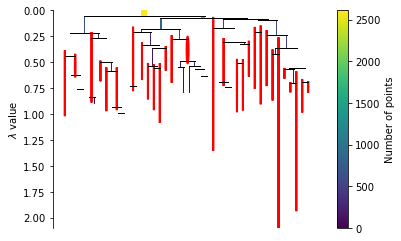

,camp,contentId,friendly_s,exciting_s,relax_s,spacious_s,clean_s,hot_water_s,parking_s,with_child_s,...,clean_r,conv_facility_r,comfort,together,fun,healing,clean,cluster,x,y
0,좋은 카라반,7934,0,0,0,0,0,0,0,0,...,0.000000,0.0,9.3,1.1,1.2,0.0,0.0,28,-14.335924,47.133091
1,성주선바위캠핑장,7935,0,0,0,0,0,0,0,0,...,0.797778,0.0,31.0,62.1,31.5,61.4,75.4,13,53.501240,-2.940920
2,이화만리캠핑장,7936,0,0,0,0,0,0,0,0,...,0.000000,0.0,9.3,1.1,1.2,0.0,0.0,-1,-17.198435,50.629250
3,하비오토캠핑장,7939,0,0,0,0,0,0,0,0,...,0.000000,0.0,15.9,13.2,3.5,22.7,0.0,15,-1.507030,-52.451199
4,수림 휴원,7940,0,0,0,0,0,0,0,0,...,0.000000,0.0,9.3,1.1,1.2,0.0,0.0,-1,-17.117577,52.122433


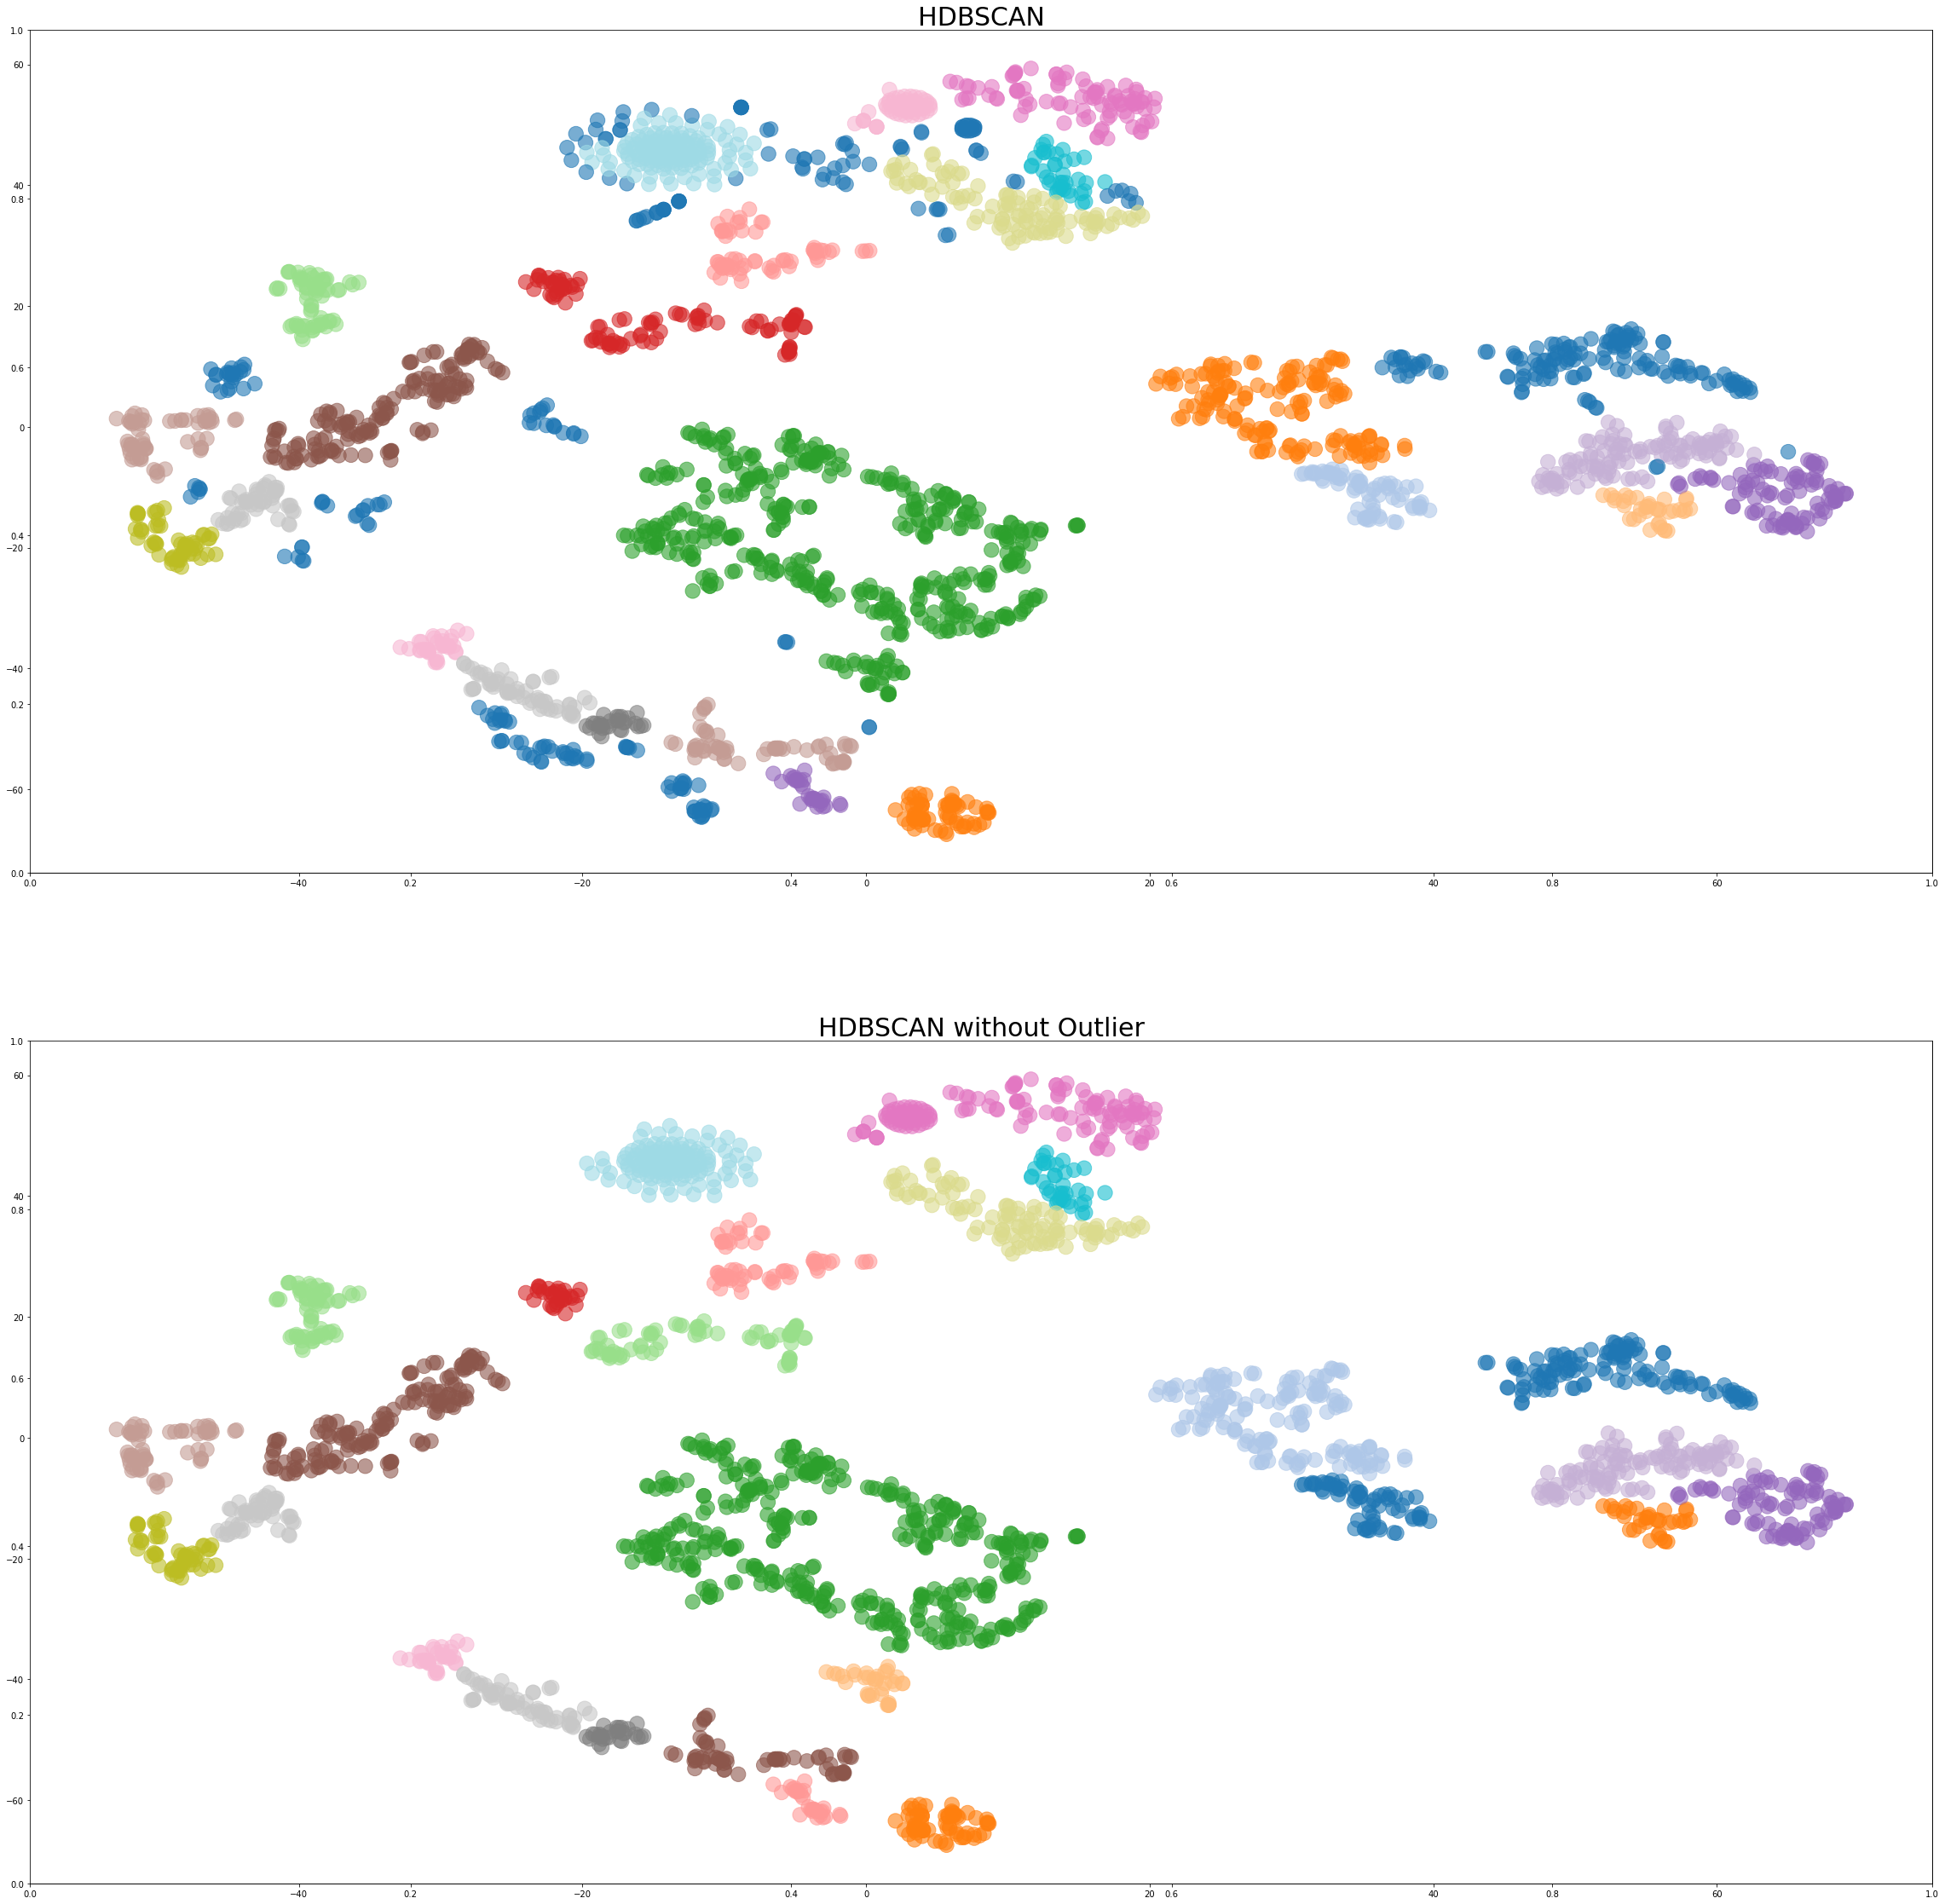

In [9]:
df = ccl.hdbscan_clustering(min_cluster_size=30, tsne=True)
df.head()

Dataframe Describe
         comfort   together        fun    healing      clean           x
count  29.000000  29.000000  29.000000  29.000000  29.000000   29.000000
mean   14.631759  18.125666  15.579381  17.125330  16.335184   80.689655
std     8.272300  23.670378  15.797095  23.129394  28.300360   76.636015
min     8.837037   1.100000   1.200000   0.000000   0.000000   30.000000
25%     9.358065   2.936508   1.833333   0.900000   0.000000   38.000000
50%    10.066667   7.841176  11.577500   3.930000   3.761432   63.000000
75%    16.700000  11.076471  23.958333  18.793303   5.500000   92.000000
max    31.615464  68.405155  51.372165  73.400000  77.753608  433.000000


,comfort,together,fun,healing,clean,x
cluster,,,,,,
-1,12.726568,9.162362,10.809594,12.241328,11.174170,271
0,30.210656,62.708197,16.104098,69.008197,71.667213,122
1,30.223881,64.880597,40.041791,32.661194,72.305970,67
2,24.581481,39.300617,18.069136,21.084568,69.880864,162
3,9.504478,3.001493,1.871642,13.744776,0.000000,67
4,30.072973,63.851351,48.200000,63.878378,60.527027,37
5,16.700000,7.841176,12.511765,43.085294,3.314706,34
6,21.756120,43.230947,22.689607,18.793303,3.761432,433
7,9.743939,3.639394,4.046970,2.177273,5.500000,66


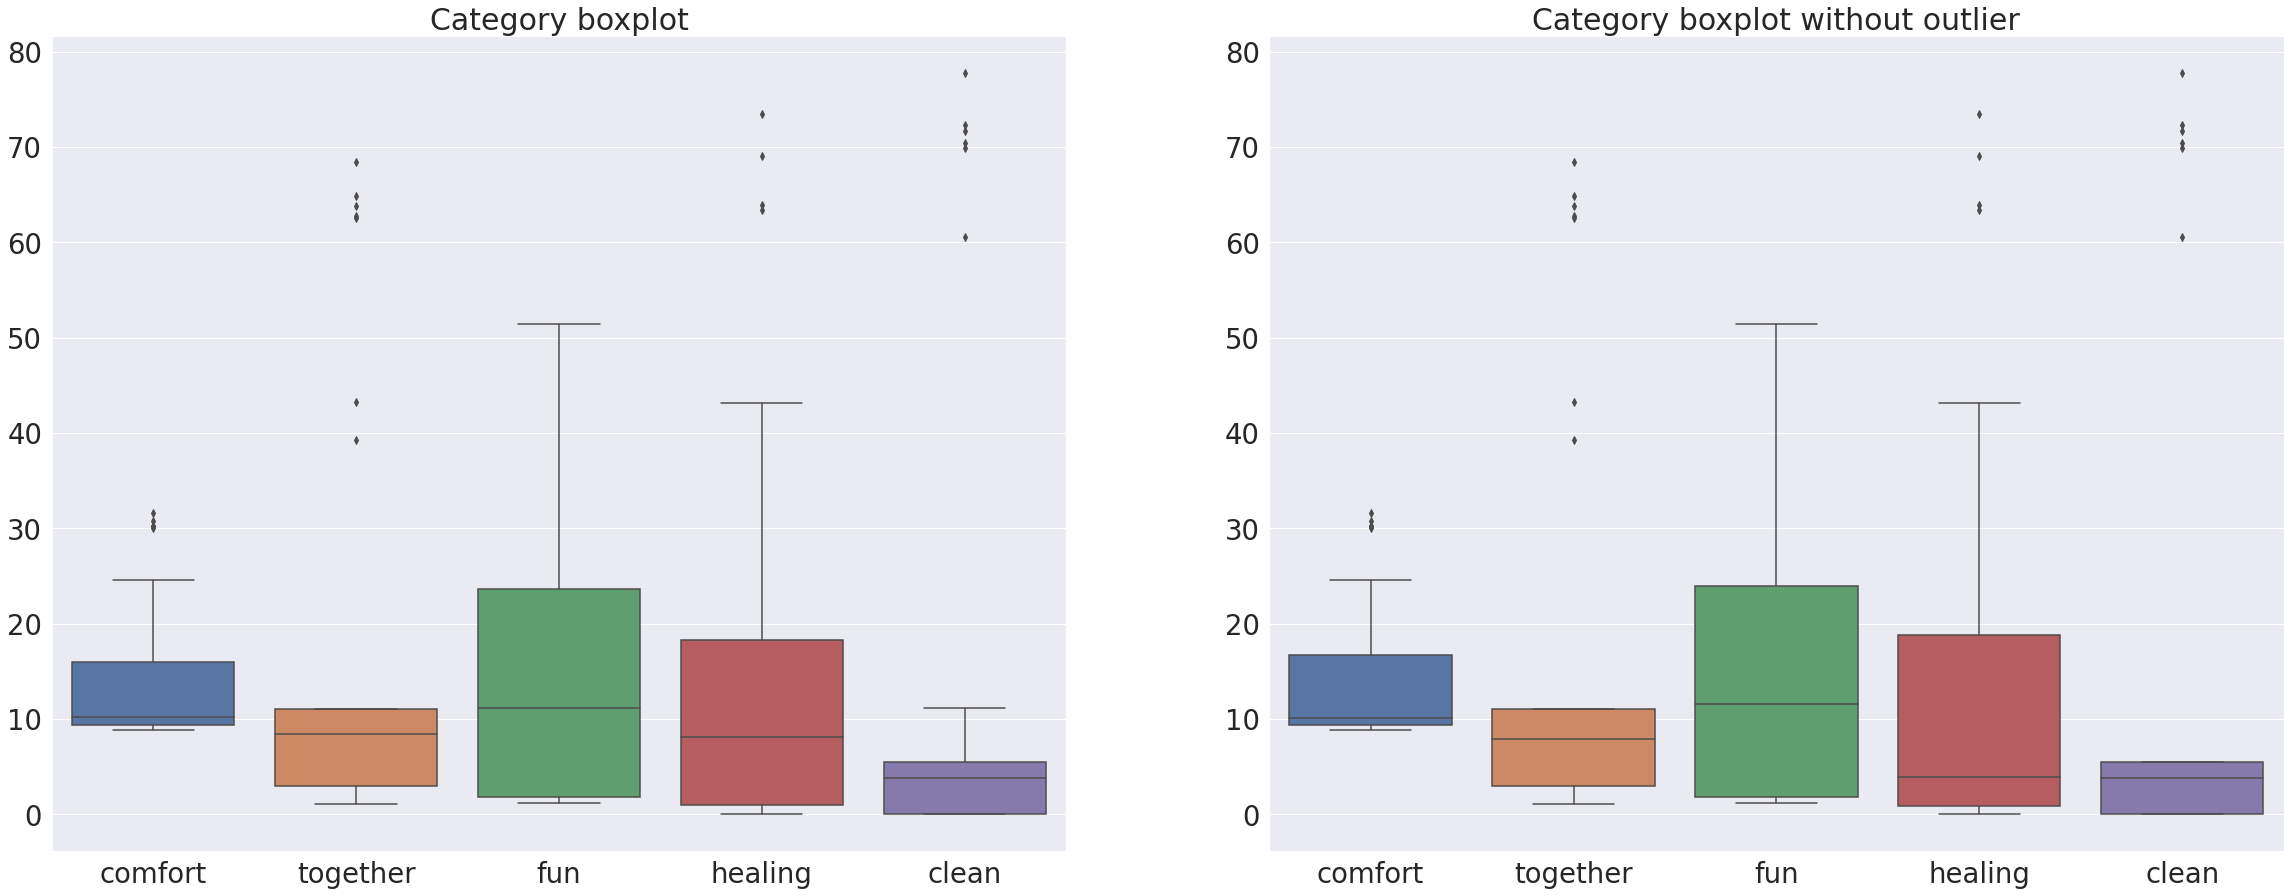

In [10]:
pv = ccl.cluster_eda(df)
pv

### min_cluster_size=100 정도는 해줘야 cluster 개수가 10 미만이 된다

Cluster labels: 10 개
original data length: 2611 / clustering data length: 2611
cluster
-1    200
 0    466
 1    252
 2    359
 3    128
 4    246
 5    107
 6    509
 7    156
 8    188
Name: contentId, dtype: int64
Condensed tree plot


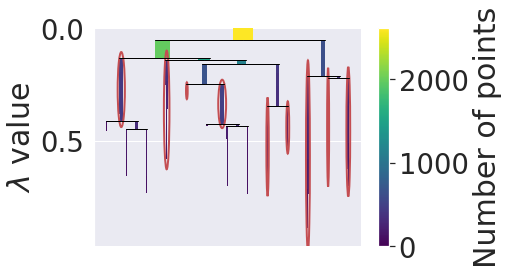

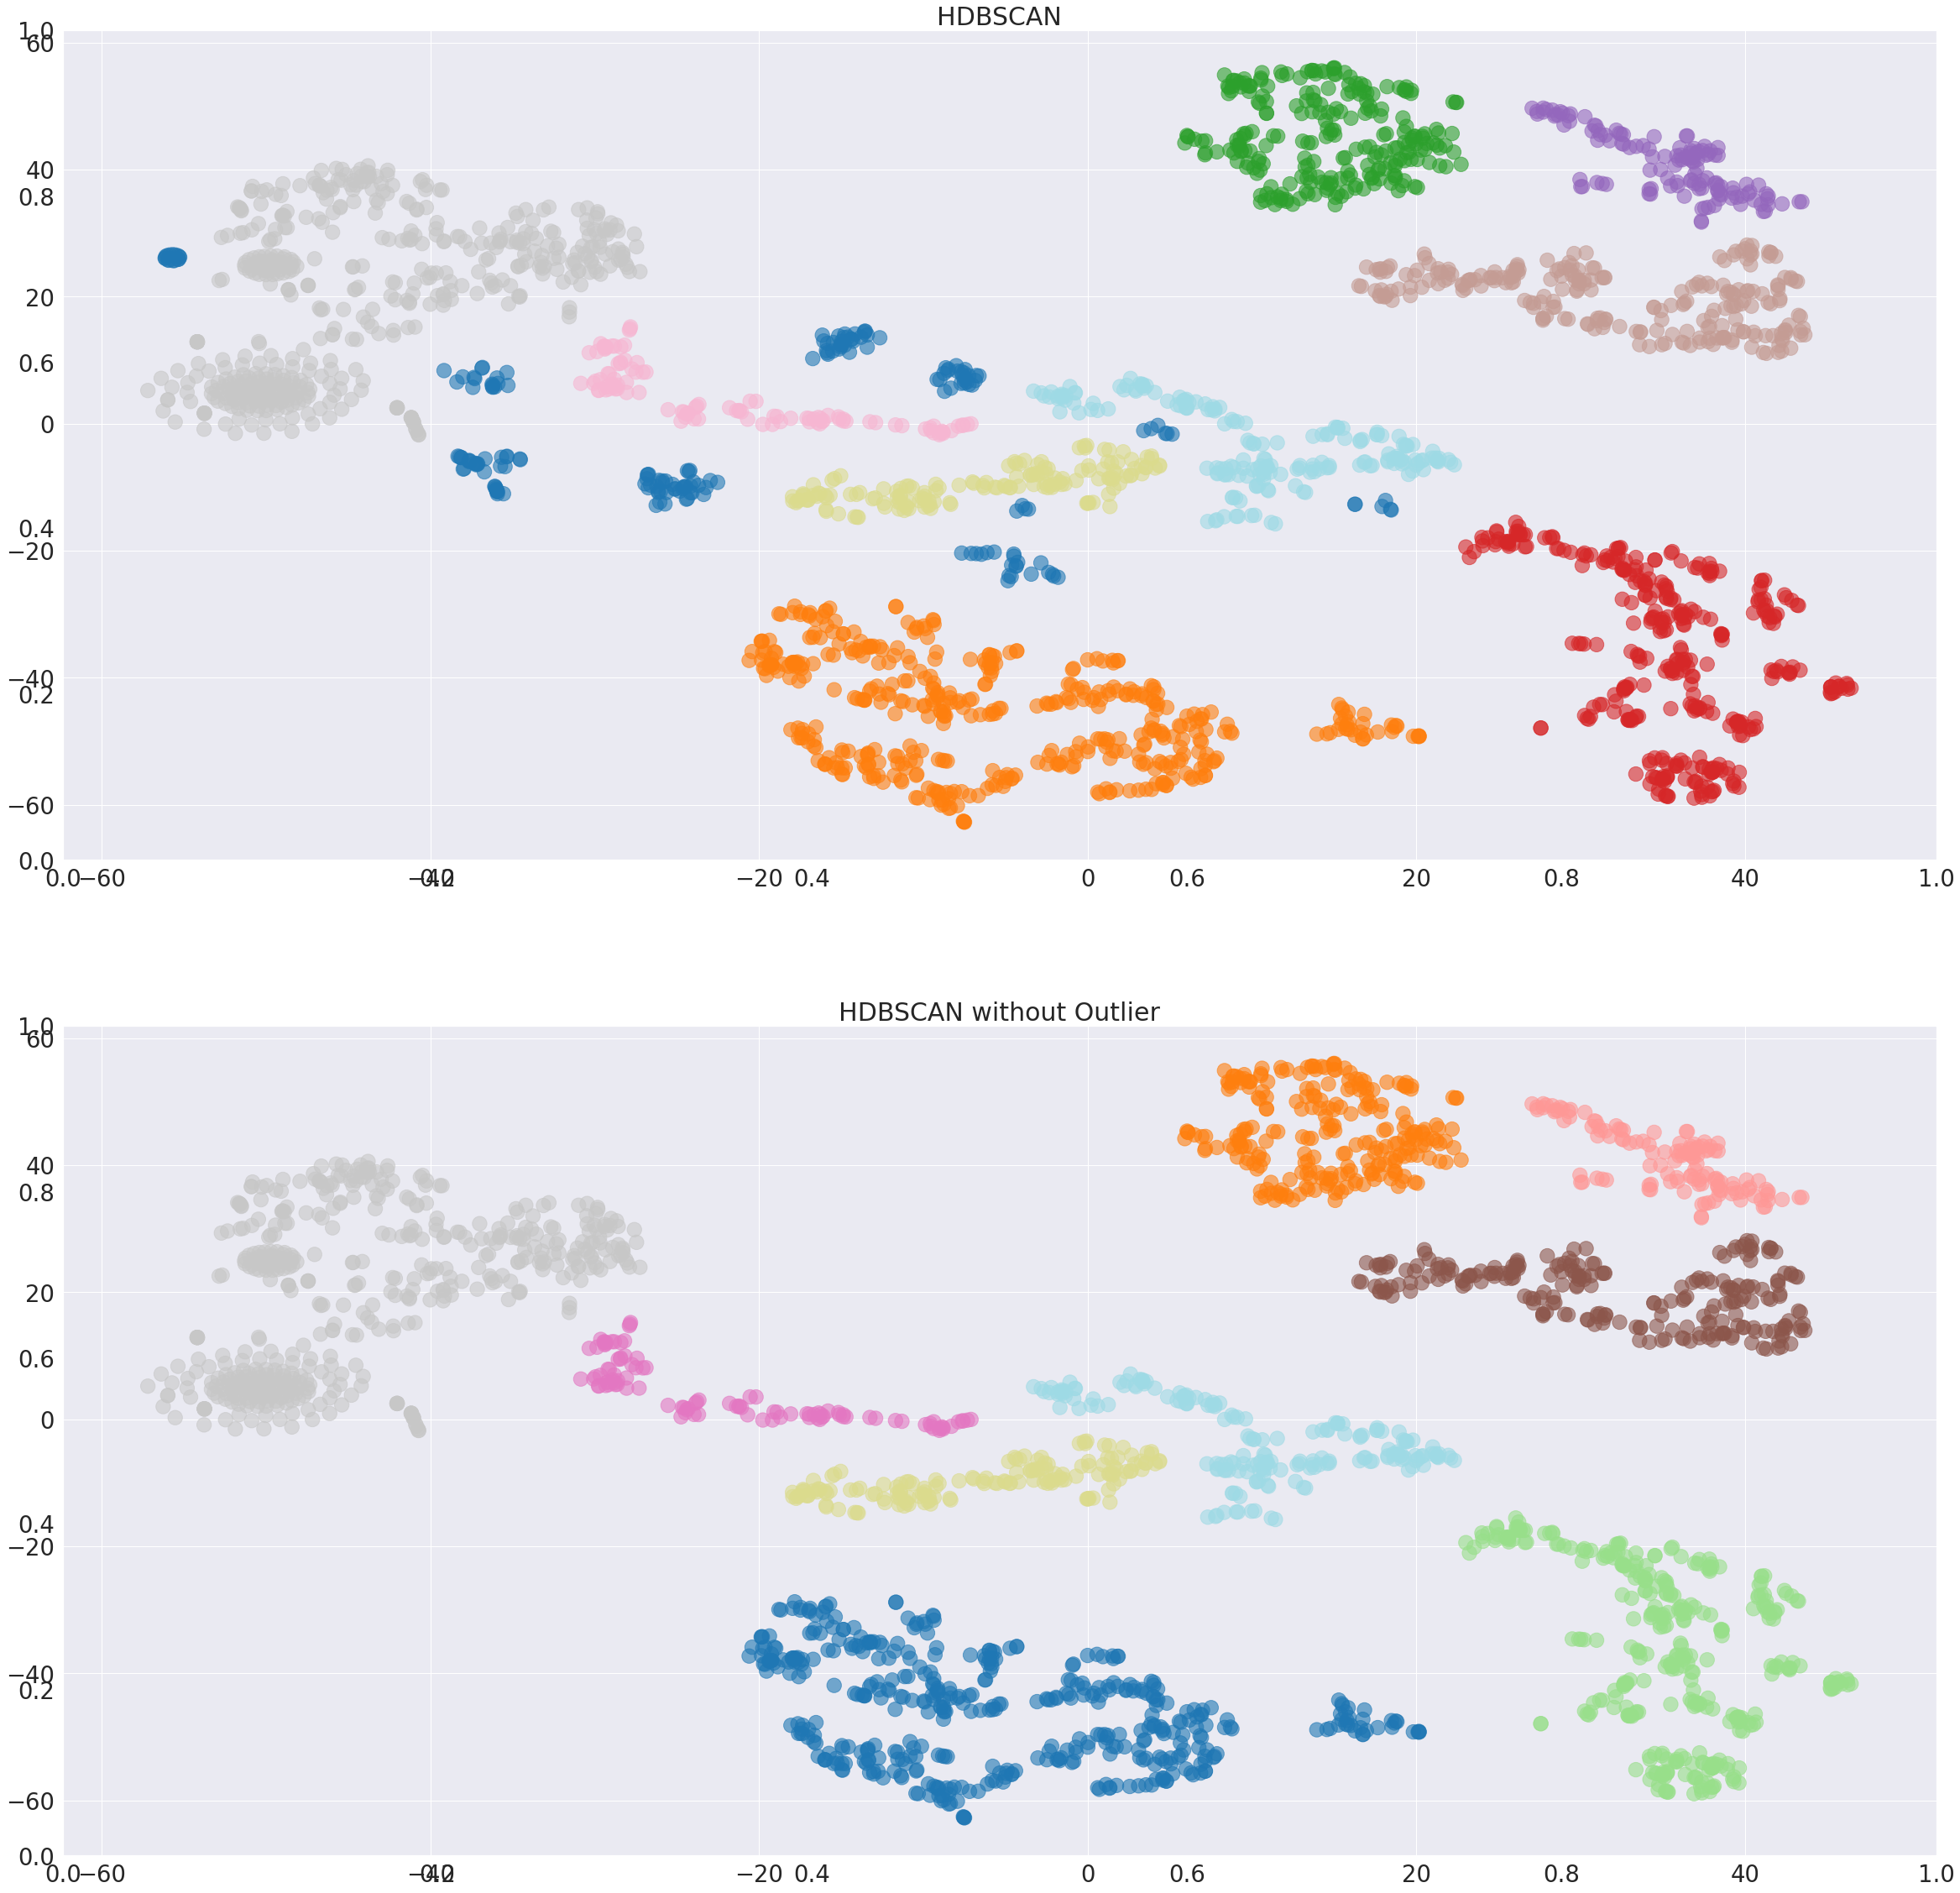

In [11]:
df2 = ccl.hdbscan_clustering(min_cluster_size=100, tsne=True)

In [12]:
df2

,camp,contentId,friendly_s,exciting_s,relax_s,spacious_s,clean_s,hot_water_s,parking_s,with_child_s,...,clean_r,conv_facility_r,comfort,together,fun,healing,clean,cluster,x,y
0,좋은 카라반,7934,0,0,0,0,0,0,0,0,...,0.000000,0.0,9.3,1.1,1.2,0.0,0.0,6,-50.667999,3.512500
1,성주선바위캠핑장,7935,0,0,0,0,0,0,0,0,...,0.797778,0.0,31.0,62.1,31.5,61.4,75.4,1,18.716923,38.987942
2,이화만리캠핑장,7936,0,0,0,0,0,0,0,0,...,0.000000,0.0,9.3,1.1,1.2,0.0,0.0,6,-54.814083,4.909056
3,하비오토캠핑장,7939,0,0,0,0,0,0,0,0,...,0.000000,0.0,15.9,13.2,3.5,22.7,0.0,2,30.231333,-45.961597
4,수림 휴원,7940,0,0,0,0,0,0,0,0,...,0.000000,0.0,9.3,1.1,1.2,0.0,0.0,6,-54.602932,3.484270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,폭포가 있는 캠핑장,3290,1,0,0,0,0,0,0,0,...,0.560000,0.0,22.9,35.6,11.1,54.4,52.9,4,42.784439,22.968252
2607,폭포골자연휴양림야영장,3291,0,1,0,0,0,1,0,0,...,0.000000,0.0,9.6,2.1,2.2,15.0,0.0,2,34.631626,-55.820068
2608,함평나비마을 서울캠핑장,3434,0,0,1,1,1,0,1,0,...,0.000000,0.0,9.9,5.2,6.2,0.0,5.5,-1,-8.757353,7.914351
2609,함허동천야영장,3436,0,0,0,1,0,0,0,1,...,0.000000,0.0,11.3,72.1,13.3,13.3,0.0,0,-13.275828,-55.617725


### cluster 간의 편차 탐색

Dataframe Describe
         comfort   together        fun    healing      clean           x
count   9.000000   9.000000   9.000000   9.000000   9.000000    9.000000
mean   17.703192  27.677454  18.169814  23.054949  25.735943  267.888889
std     9.519750  25.851766  12.264664  27.153835  34.626549  146.103939
min     9.145776   1.151866   1.228291   0.000000   0.000000  107.000000
25%     9.842308   7.855710  11.576923   2.914894   3.178830  156.000000
50%    11.035638  10.110256  16.196875  15.564345   3.725107  246.000000
75%    26.554065  46.346341  24.050407  27.594309  71.439024  359.000000
max    30.977778  64.770238  41.451190  68.252344  72.255469  509.000000


,comfort,together,fun,healing,clean,x
cluster,,,,,,
-1,11.567000,4.994000,5.602500,2.427000,4.767000,200
0,21.414807,40.690129,21.909442,20.544850,3.725107,466
1,30.977778,64.770238,41.451190,67.650794,71.838889,252
2,10.384958,7.855710,13.900000,15.564345,3.178830,359
3,30.311719,62.929687,16.196875,68.252344,72.255469,128
4,26.554065,46.346341,24.050407,27.594309,71.439024,246
5,9.661682,7.143925,5.309346,1.869159,0.000000,107
6,9.145776,1.151866,1.228291,0.000000,0.000000,509
7,9.842308,10.110256,11.576923,3.103846,5.500000,156


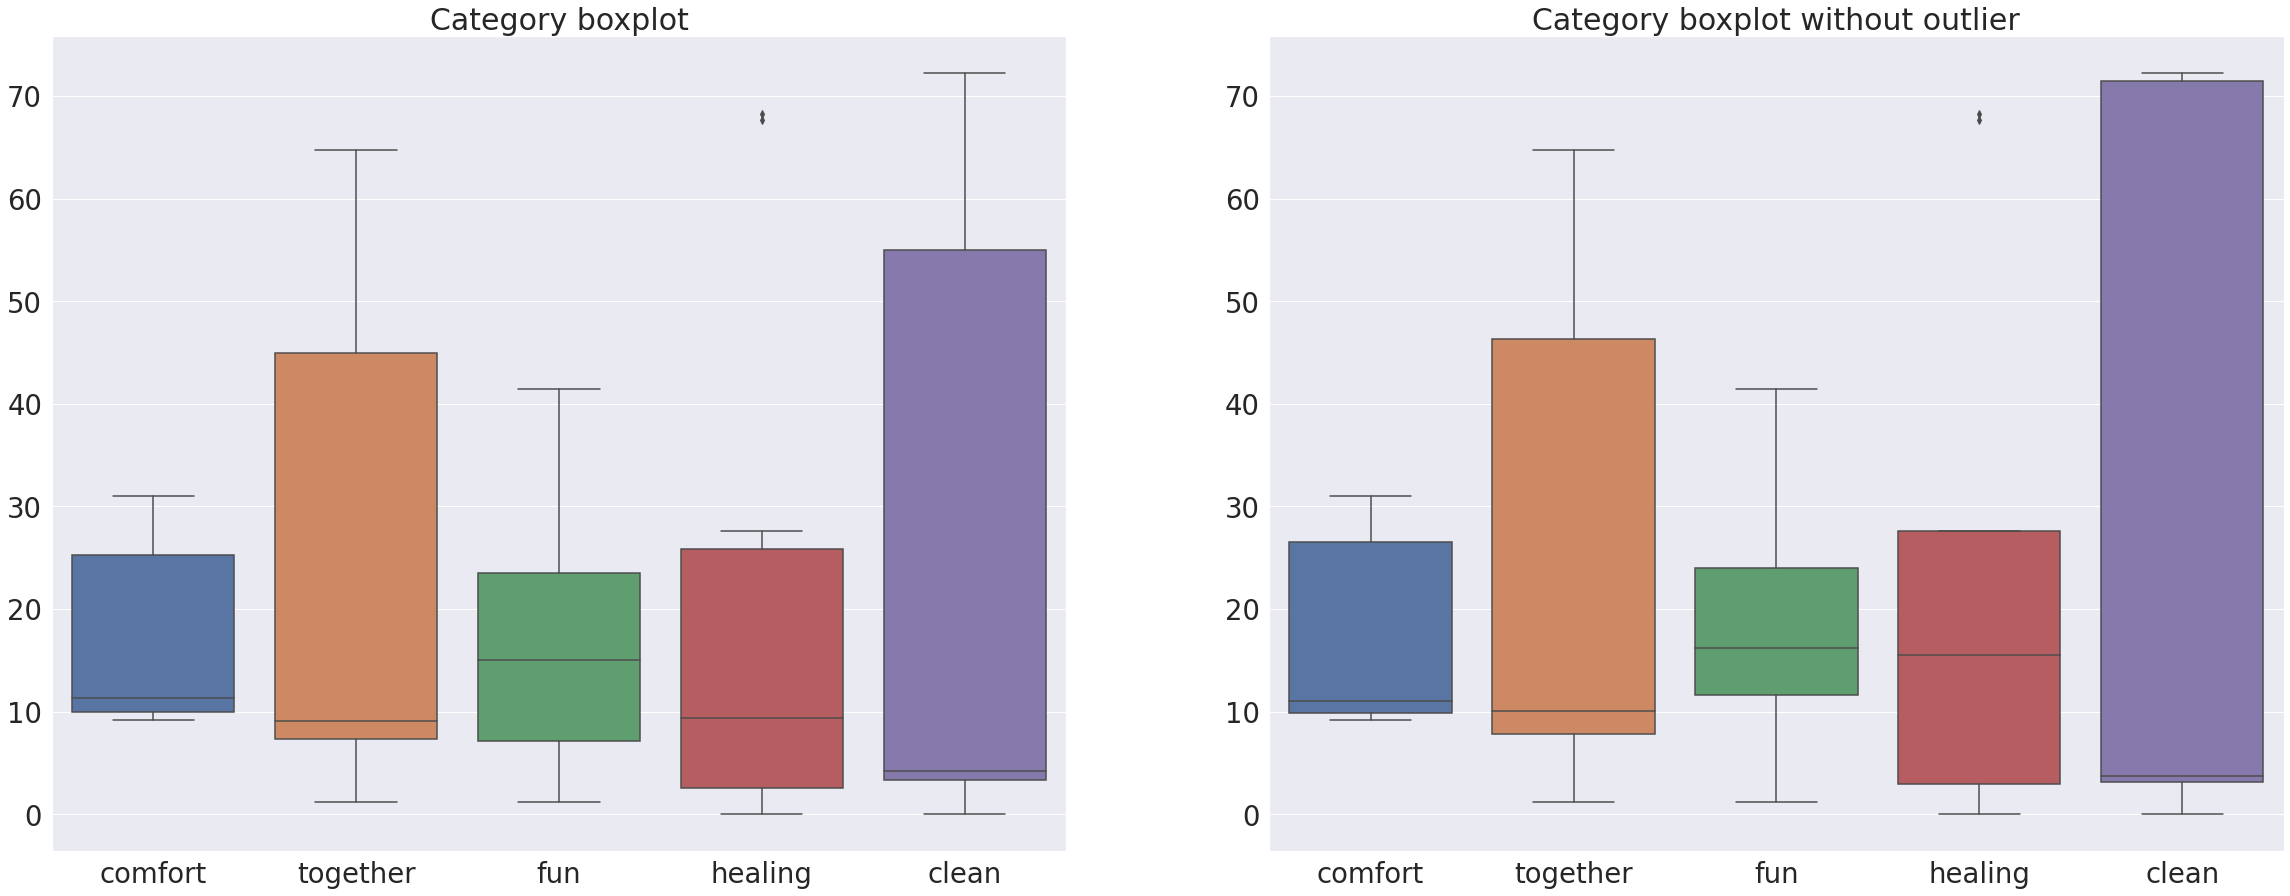

In [15]:
pv2 = ccl.cluster_eda(df2)
pv2

In [16]:
# ccl.export_result(df)
ccl.export_result(df2)

Report has Saved!


### cluster 별 특성 탐색

In [30]:
df3 = df2[['cluster', 'comfort', 'together', 'fun', 'healing', 'clean']].copy()
df3.set_index('cluster', drop=True, inplace=True)

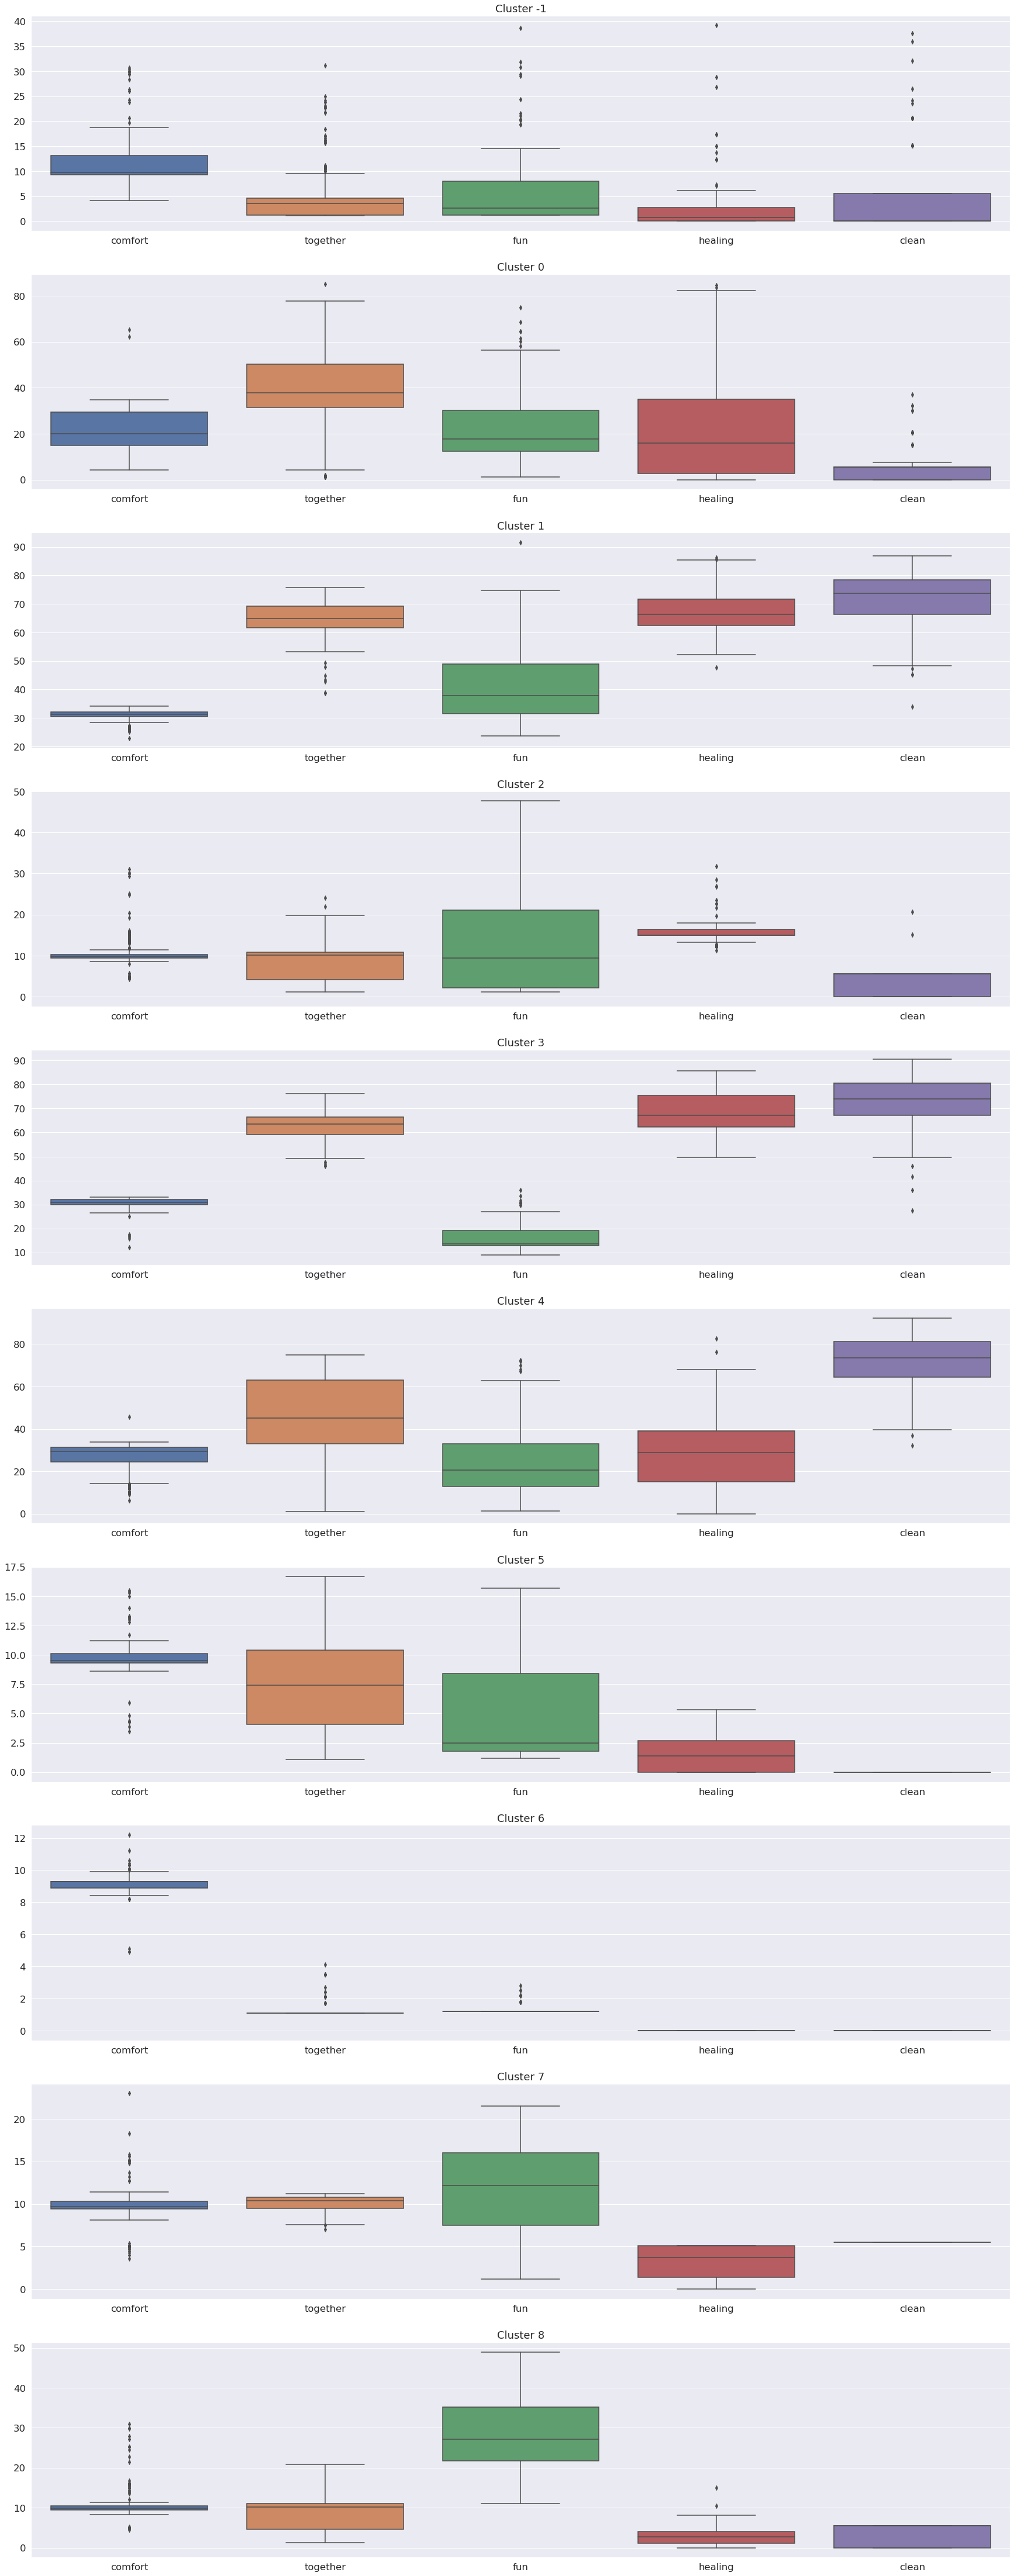

In [38]:
sns.set(font_scale=1.5)
c_ls = np.unique(df3.index).tolist()
fig, ax = plt.subplots(len(c_ls), 1, figsize=(30,80))
                       
for idx, c in enumerate(c_ls):
    t_df = df3[df3.index==c]
    sns.boxplot(data=t_df, ax=ax[idx])
    ax[idx].set_title(f"Cluster {c}")
fig.show()